# Outline

1. Studying the trend of gender proportion in STEM diciplines by line charts
2. Studying the trend of gender proportion in Liberal Arts diciplines by line charts
3. Comparing the trend of gender proportion betweem STEM, Liberal Arts, and the other diciplines.
4. Generating a interactive plot to observe gender proportions betweem STEM, Liberal Arts, and the other diciplines across years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

# two colors in Color Blind 10 palette
cb_dark_blue = (0/255,107/255,164/255) 
cb_orange = (255/255, 128/255, 14/255)

women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [3]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

In [4]:
women_degrees.shape

(42, 18)

In [5]:
# split all categories into three groups
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 
             'Physical Sciences', 'Computer Science', 
             'Engineering']

lib_arts_cats = ['Foreign Languages', 'English', 
                 'Communications and Journalism', 
                 'Art and Performance', 
                 'Social Sciences and History']

other_cats = ['Health Professions', 'Public Administration', 
              'Education', 'Agriculture',
              'Business', 'Architecture']

## Comparing across  STEM (Science, Technology, Engineering, Mathematics) 

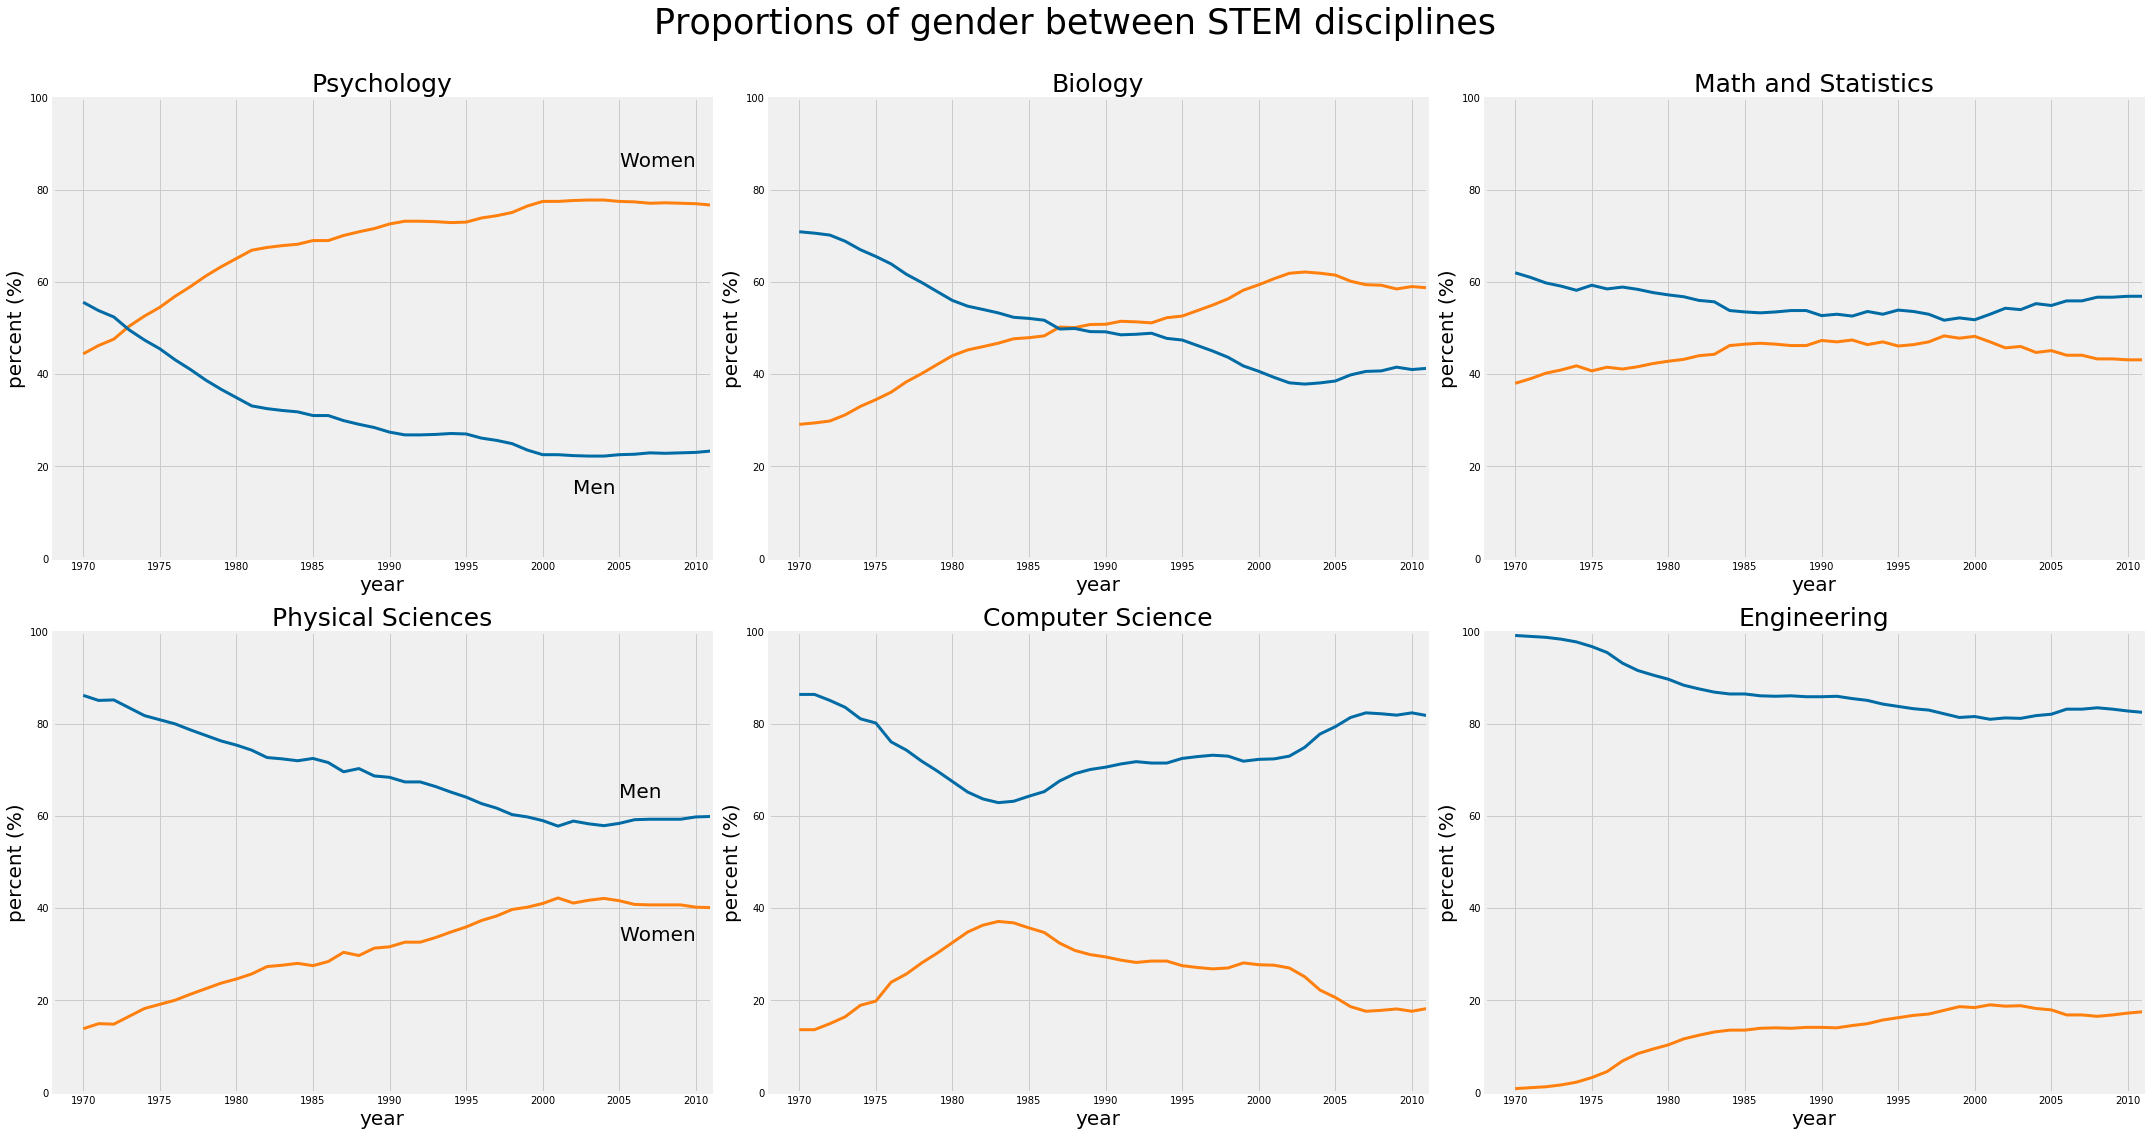

In [6]:
fig, axis = plt.subplots(nrows=2, ncols=3,
                         figsize=(30, 15))
fig.suptitle("Proportions of gender between STEM disciplines", 
             fontsize=35, y=1.05)

for subject, ax in zip(stem_cats, axis.flat):
    #plot the line
    ax.plot(women_degrees['Year'], women_degrees[subject], 
            c=cb_orange, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[subject], 
            c=cb_dark_blue, label='Men', linewidth=3)
    
    # set graph attriibutes
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(subject, fontsize=25)
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off")
    ax.set_ylabel("percent (%)", size=20)
    ax.set_xlabel("year", size=20)
    
    # add the text to represent the line label 
    # on the first and last graphs
    if  subject == "Psychology":
        ax.text(2005, 85, 'Women', size=20)
        ax.text(2002, 14, 'Men', size=20)
    elif subject == "Physical Sciences":
        ax.text(2005, 64, 'Men', size=20)
        ax.text(2005, 33, 'Women', size=20)
        
plt.tight_layout(pad=1.2)

## Comparing across liberal arts

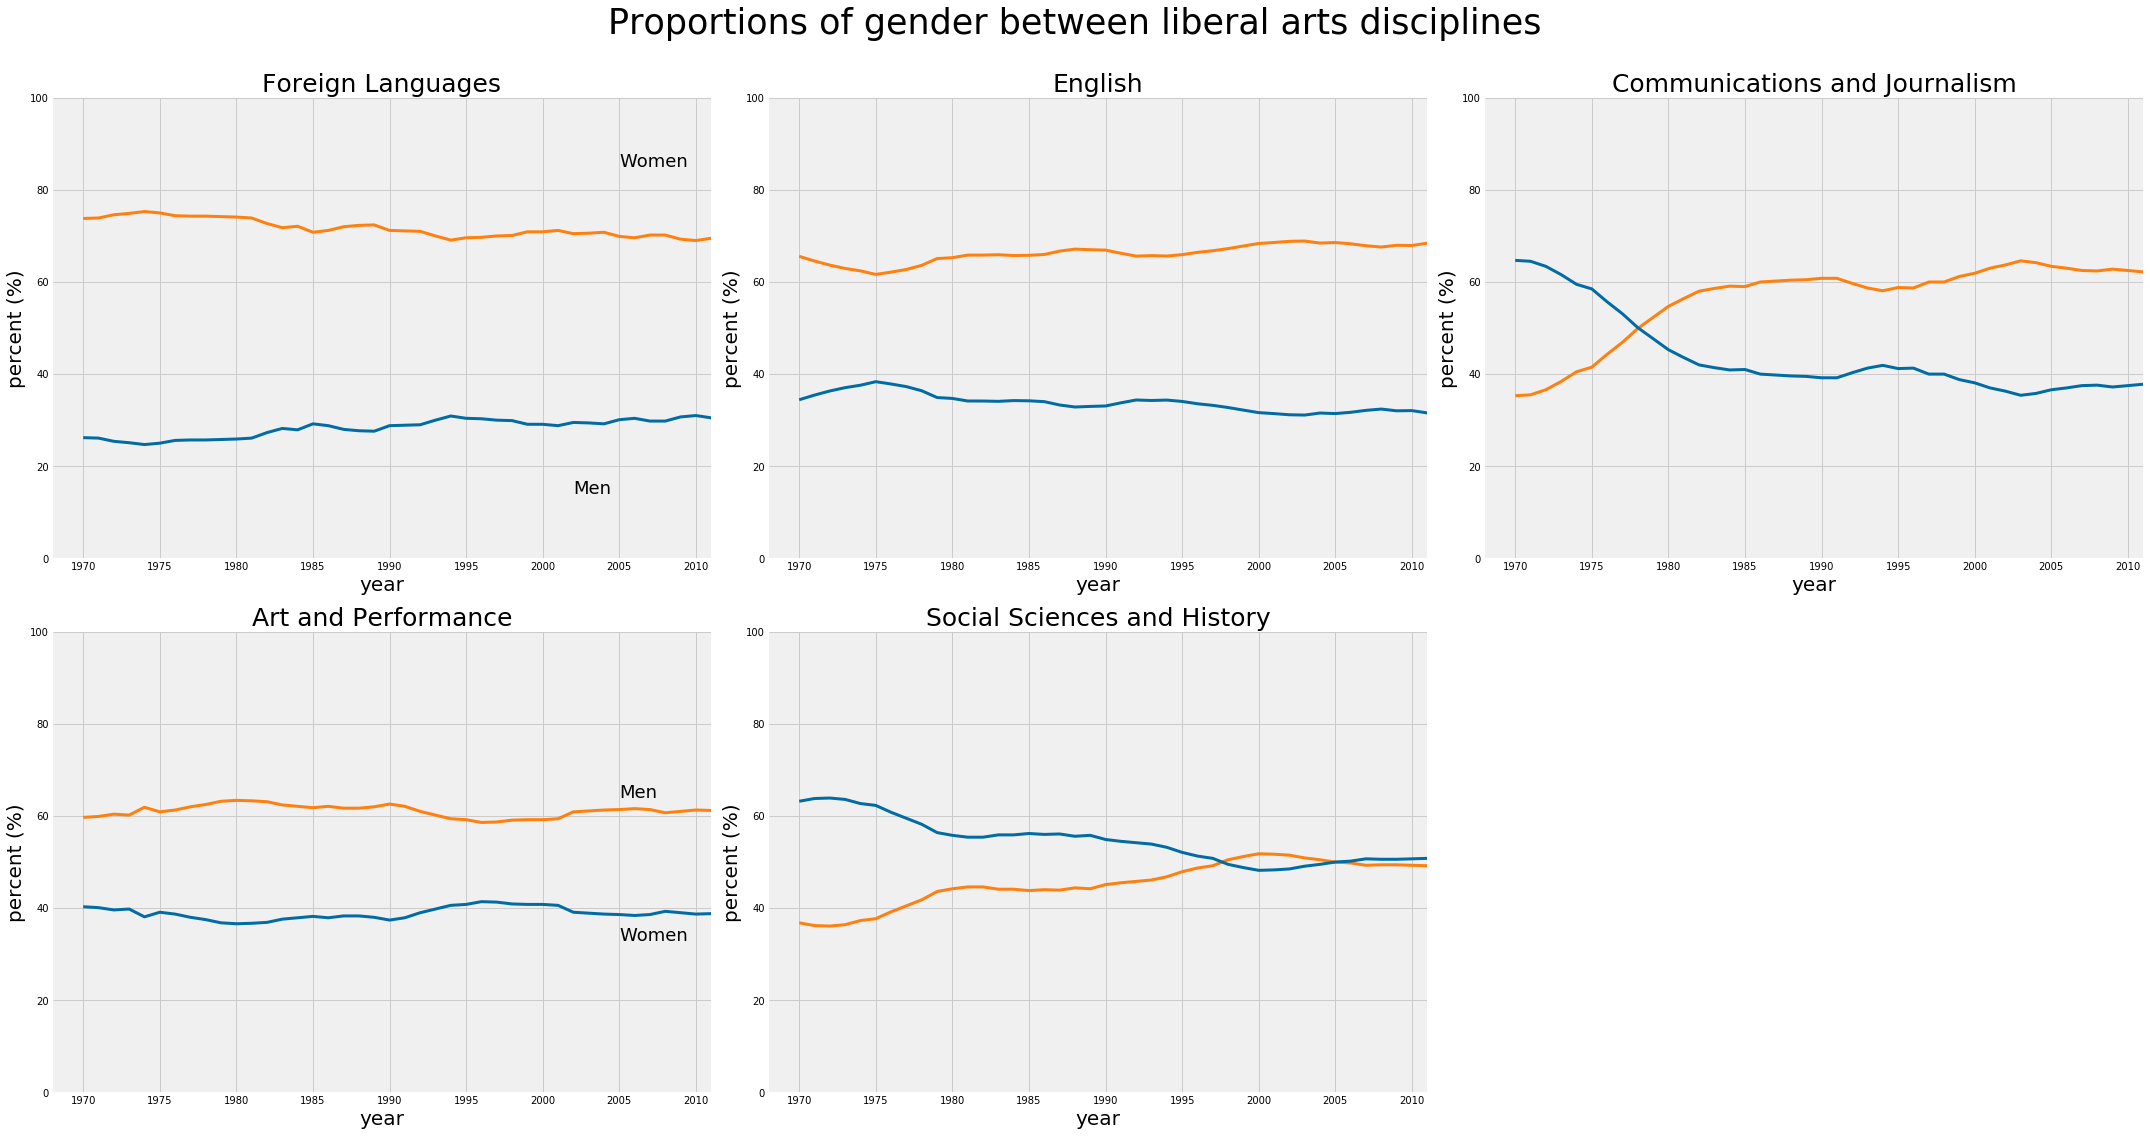

In [7]:
fig, axis = plt.subplots(nrows=2, ncols=3,
                         figsize=(30, 15))
fig.suptitle("Proportions of gender between liberal arts disciplines", 
             fontsize=35, y=1.05)

for subject, ax in zip(lib_arts_cats, axis.flat):
    
    #plot the line
    ax.plot(women_degrees['Year'], women_degrees[subject], 
            c=cb_orange, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[subject], 
            c=cb_dark_blue, label='Men', linewidth=3)
    
    #remove all the spines
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    
    # set graph attriibutes
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(subject, fontsize=25)
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off")
    ax.set_ylabel("percent (%)", size=20)
    ax.set_xlabel("year", size=20)
    
    # add the text to represent the line label 
    # on the first and last graphs
    if subject == "Foreign Languages":
        ax.text(2005, 85, 'Women', size=18)
        ax.text(2002, 14, 'Men', size=18)
    elif subject == "Art and Performance":
        ax.text(2005, 64, 'Men', size=18)
        ax.text(2005, 33, 'Women', size=18)

axis[1][2].set_axis_off()
plt.tight_layout(pad=1.2)

## Comparing across all degree categories

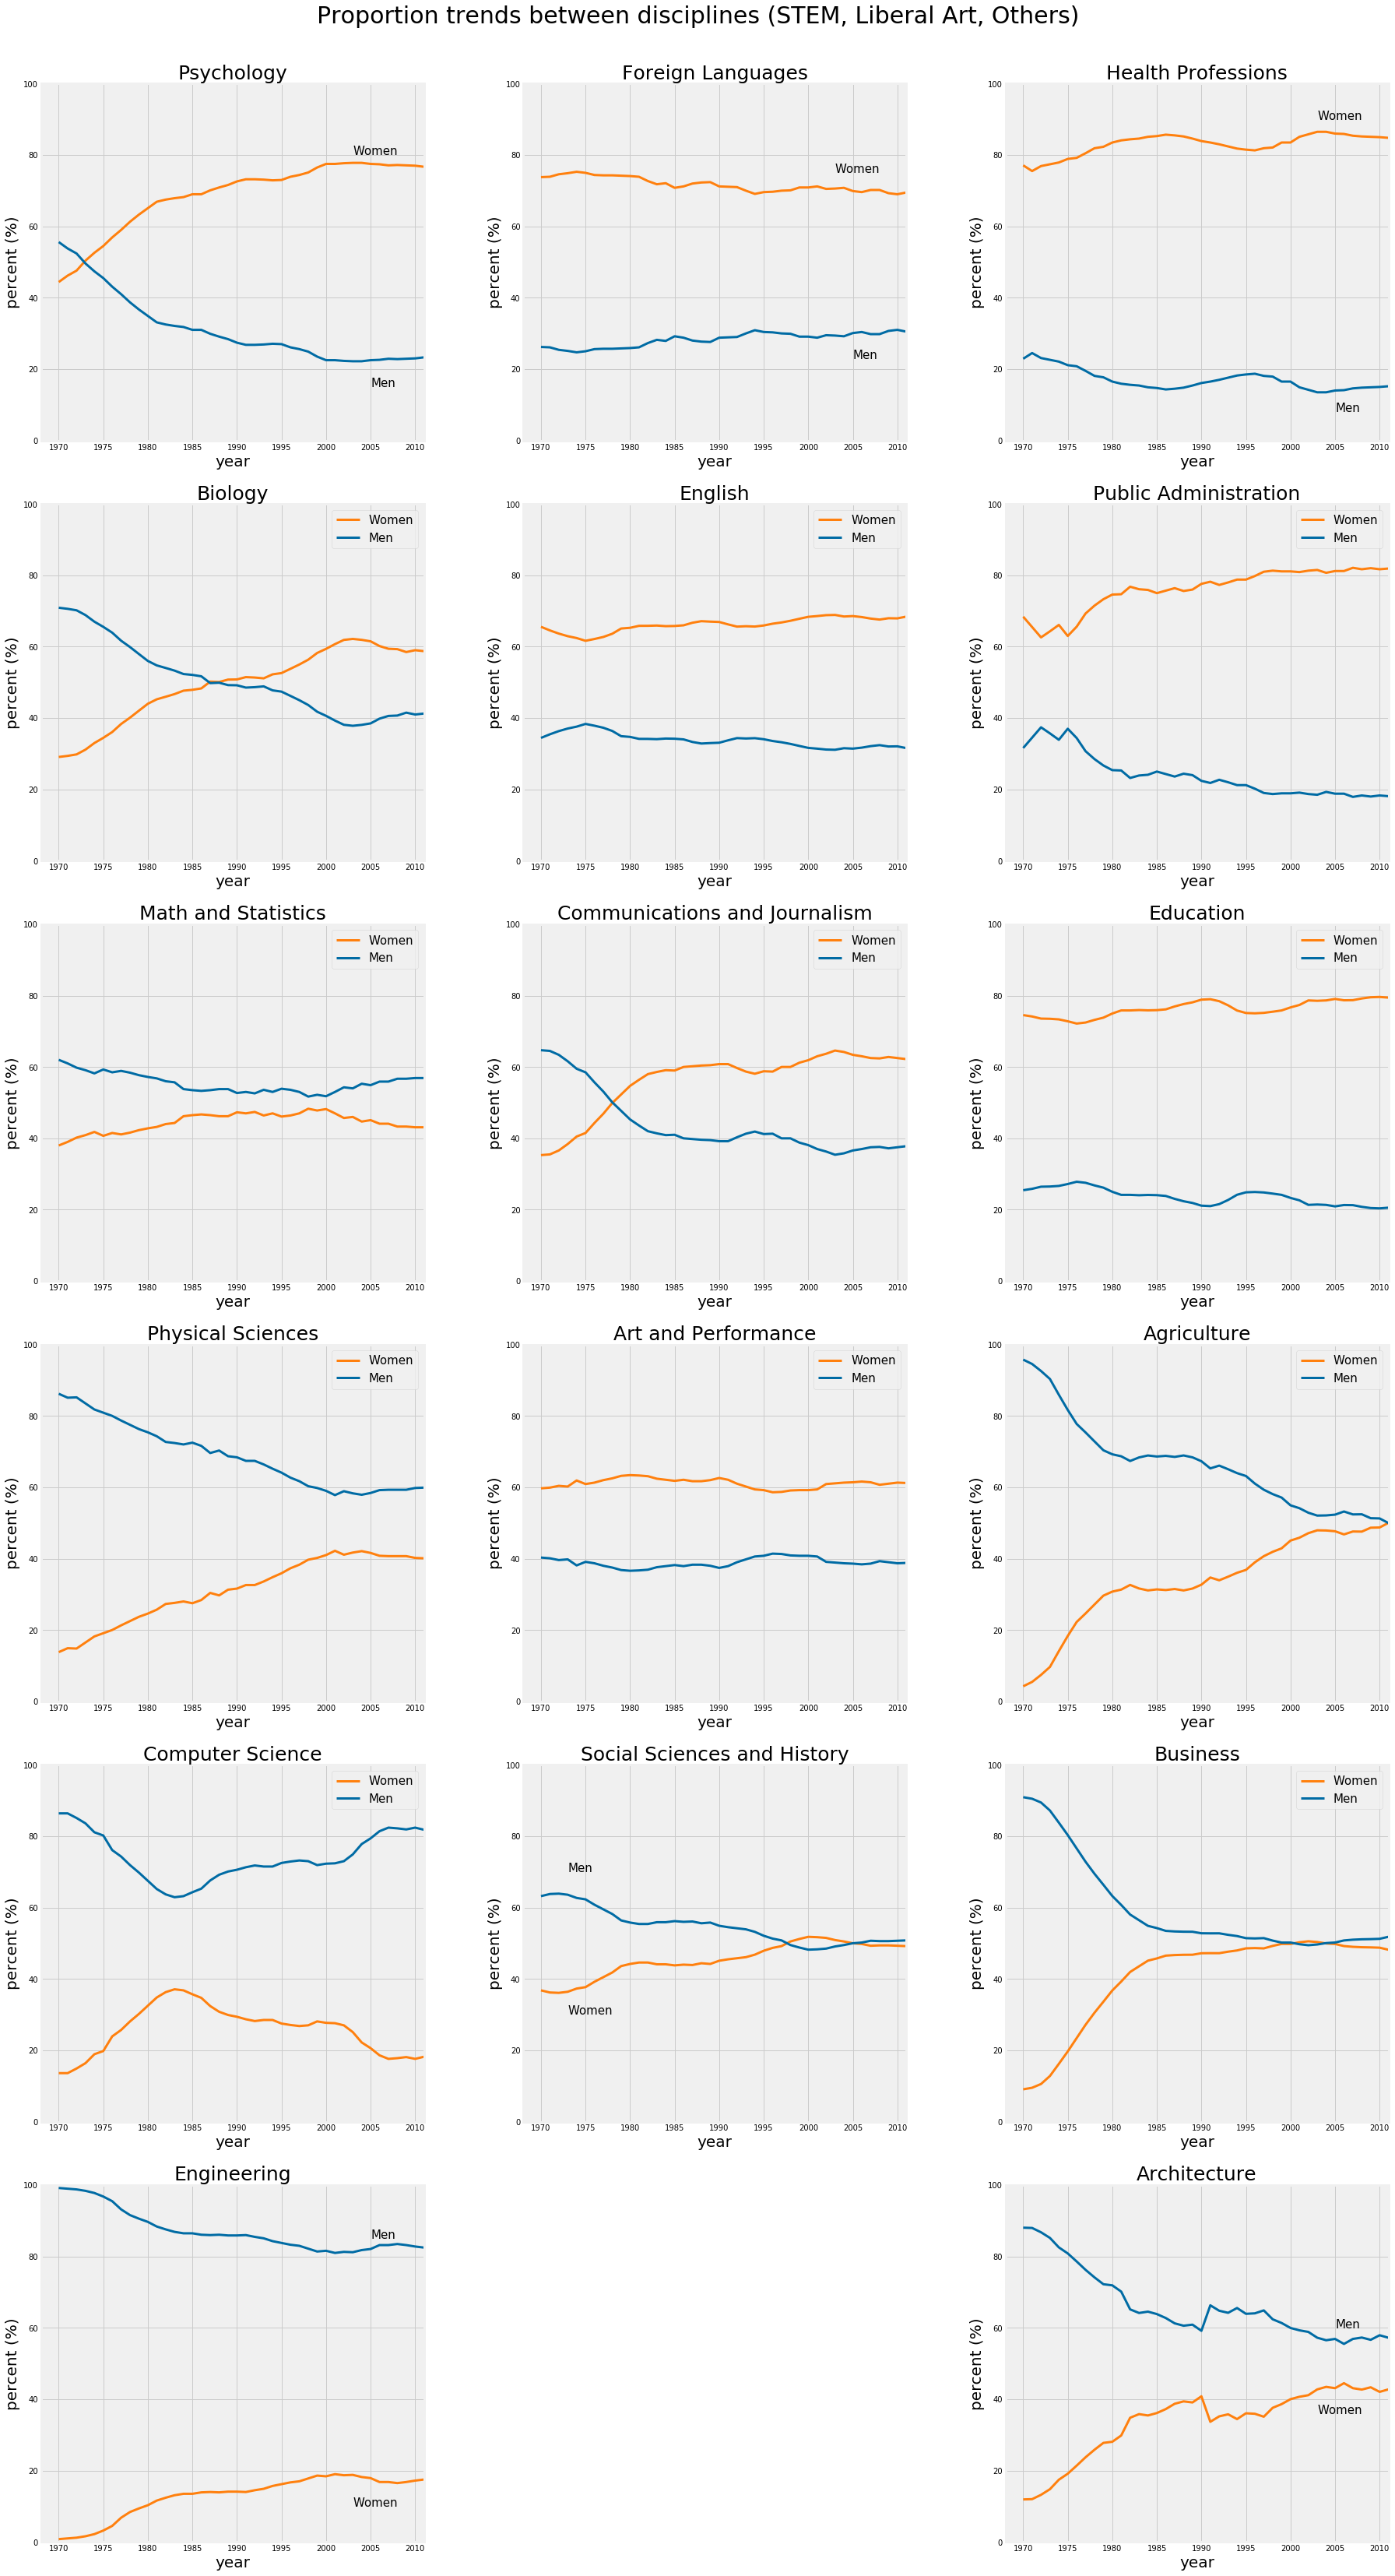

In [8]:
fig = plt.figure(figsize=(25,45))
plt.suptitle("Proportion trends between disciplines (STEM, Liberal Art, Others)", x=.5, y=1.02, size=30)

# Generate first column (stem)
for i in range(1,19,3):
    cat_index = int((i-1)/3)
    # plot a 6 by 3 figure
    ax = fig.add_subplot(6,3,i)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], 
            c=cb_orange, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], 
            c=cb_dark_blue, label='Men', linewidth=3)
    
    # set graph attributes
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index], size=25)
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off")
    ax.set_ylabel("percent (%)", size=20)
    ax.set_xlabel("year", size=20)
    plt.legend(prop={'size': 15})
    
    if cat_index == 0:
        ax.text(2003, 80, 'Women', size=15)
        ax.text(2005, 15, 'Men', size=15)
        ax.get_legend().remove()
    elif cat_index == 5:
        ax.text(2005, 85, 'Men', size=15)
        ax.text(2003, 10, 'Women', size=15)
        ax.get_legend().remove()

# Generate second column (liberal art)
for i in range(2,15,3):
    cat_index = int((i-1)/3)
    ax = fig.add_subplot(6,3,i)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], 
            c=cb_orange, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], 
            c=cb_dark_blue, label='Men', linewidth=3)
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index], size=25)
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off")
    ax.set_ylabel("percent (%)", size=20)
    ax.set_xlabel("year", size=20)
    plt.legend(prop={'size': 15})
    
    if cat_index == 0:
        ax.text(2003, 75, 'Women', size=15)
        ax.text(2005, 23, 'Men', size=15)
        ax.get_legend().remove()
    elif cat_index == 4:
        ax.text(1973, 30, 'Women', size=15)
        ax.text(1973, 70, 'Men', size=15)
        ax.get_legend().remove()
        
# Generate third column (other)
for i in range(3,19,3):
    cat_index = int((i-1)/3)
    ax = fig.add_subplot(6,3,i)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], 
            c=cb_orange, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], 
            c=cb_dark_blue, label='Men', linewidth=3)

    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index], size=25)
    ax.tick_params(bottom="off", top="off", 
                   left="off", right="off")
    ax.set_ylabel("percent (%)", size=20)
    ax.set_xlabel("year", size=20)
    plt.legend(prop={'size': 15})
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women', size=15)
        ax.text(2005, 8, 'Men', size=15)
        ax.get_legend().remove()
    elif cat_index == 5:
        ax.text(2005, 60, 'Men', size=15)
        ax.text(2003, 36, 'Women', size=15)
        ax.get_legend().remove()
plt.tight_layout(h_pad=2, w_pad=8)

# Interactive graph 

In [9]:
tidy_data = women_degrees.melt(id_vars="Year", value_vars=women_degrees.columns[1:], 
                               var_name="Discipline", value_name="Female proportion")
tidy_data.head(10)

,Year,Discipline,Female proportion
0,1970,Agriculture,4.229798
1,1971,Agriculture,5.452797
2,1972,Agriculture,7.420710
3,1973,Agriculture,9.653602
4,1974,Agriculture,14.074623
5,1975,Agriculture,18.333162
6,1976,Agriculture,22.252760
7,1977,Agriculture,24.640177
8,1978,Agriculture,27.146192
9,1979,Agriculture,29.633365


In [10]:
tidy_data["Male proportion"] = 100 - tidy_data["Female proportion"]
tidy_data = tidy_data.round(2)
tidy_data.head()

,Year,Discipline,Female proportion,Male proportion
0,1970,Agriculture,4.23,95.77
1,1971,Agriculture,5.45,94.55
2,1972,Agriculture,7.42,92.58
3,1973,Agriculture,9.65,90.35
4,1974,Agriculture,14.07,85.93


In [11]:
def which_type(subject):
    if subject in stem_cats:
        return "STEM"
    elif subject in lib_arts_cats:
        return "Liberal Arts"
    else :
        return "Others"

tidy_data["Type"] = tidy_data["Discipline"].apply(which_type)
tidy_data.head()

,Year,Discipline,Female proportion,Male proportion,Type
0,1970,Agriculture,4.23,95.77,Others
1,1971,Agriculture,5.45,94.55,Others
2,1972,Agriculture,7.42,92.58,Others
3,1973,Agriculture,9.65,90.35,Others
4,1974,Agriculture,14.07,85.93,Others


In [12]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [13]:
from bokeh.io import show, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, Select
from bokeh.layouts import column
from ipywidgets import interact

year=1970

source1 = tidy_data[(tidy_data["Type"] == "STEM") & (tidy_data["Year"] == year)]
s = figure(y_range=source1["Discipline"], plot_height=250, 
           plot_width=800, title="STEM")
sg = s.hbar_stack(stackers=["Female proportion", "Male proportion"], y="Discipline", height=0.8, 
             source=source1, color=["pink", "lightblue"])

source2 = tidy_data[(tidy_data["Type"] == "Liberal Arts") & (tidy_data["Year"] == year)]
l = figure(y_range=source2["Discipline"], plot_height=250,
           plot_width=800, title="Liberal Arts")
lg = l.hbar_stack(stackers=["Female proportion", "Male proportion"], y="Discipline", height=.8, 
                  source=source2, color=["pink", "lightblue"])

source3 = tidy_data[(tidy_data["Type"] == "Others") & (tidy_data["Year"] == year)]
o = figure(y_range=source3["Discipline"], plot_height=250,
           plot_width=800, title="Others")
og = o.hbar_stack(stackers=["Female proportion", "Male proportion"], y="Discipline", height=0.8, 
             source=source3, color=["pink", "lightblue"])

def update(year, subjects):
    sg[0].data_source.data = dict(tidy_data[(tidy_data["Type"] == "STEM") & (tidy_data["Year"] == year)])
    sg[1].data_source.data = dict(tidy_data[(tidy_data["Type"] == "STEM") & (tidy_data["Year"] == year)])
    
    lg[0].data_source.data = dict(tidy_data[(tidy_data["Type"] == "Liberal Arts") & (tidy_data["Year"] == year)])
    lg[1].data_source.data = dict(tidy_data[(tidy_data["Type"] == "Liberal Arts") & (tidy_data["Year"] == year)])
    
    og[0].data_source.data = dict(tidy_data[(tidy_data["Type"] == "Others") & (tidy_data["Year"] == year)])
    og[1].data_source.data = dict(tidy_data[(tidy_data["Type"] == "Others") & (tidy_data["Year"] == year)])
    if subjects == "STEM":
        show(s, notebook_handle=True)
    elif subjects == "Liberal Arts":
        show(l)
    elif subjects == "Others":
        show(o)
    push_notebook()

interact(update, year=(1970, 2011), subjects=["STEM", "Liberal Arts", "Others"]);

interactive(children=(IntSlider(value=1990, description='year', max=2011, min=1970), Dropdown(description='sub…